In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd

import json
import glob
import os

In [2]:
data = json.load(open('/home/zeitz/dev/bmw_routing/engine/1.1.json'))

In [3]:
queries = pd.DataFrame.from_records([{ 
    'weight_factor': 1.1, 
    'graph': data['args'][1],
    **algo } 
    for algo in data['algo_runs'] if algo.get('algo') == 'CH Potentials Query'])

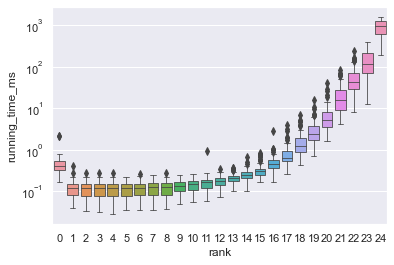

In [7]:
g = sns.boxplot(data=queries, x='rank', y='running_time_ms', linewidth=0.8)
g.set_yscale('log')

In [30]:
queries = queries.append(pd.DataFrame.from_records([{ 
    'weight_factor': 1.5, 
    'graph': data['args'][1],
    **algo } 
    for algo in json.load(open('/home/zeitz/dev/bmw_routing/engine/1.5.json'))['algo_runs'] if algo.get('algo') == 'CH Potentials Query']))

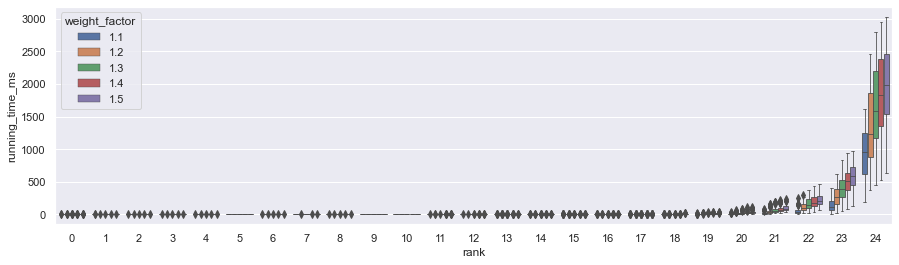

In [31]:
plt.figure(figsize=(15,4))
g = sns.boxplot(data=queries, x='rank', y='running_time_ms', hue='weight_factor', linewidth=0.8)

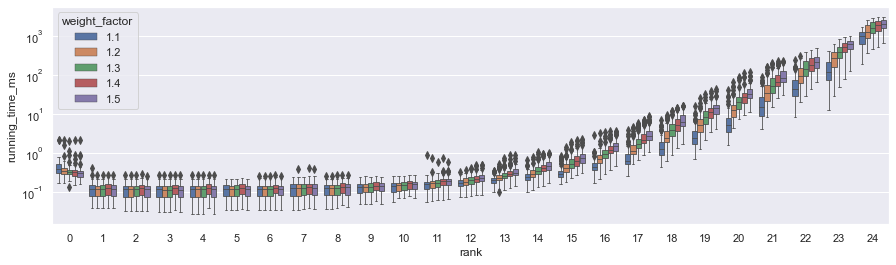

In [32]:
plt.figure(figsize=(15,4))
g = sns.boxplot(data=queries, x='rank', y='running_time_ms', hue='weight_factor', linewidth=0.8)
g.set_yscale('log')

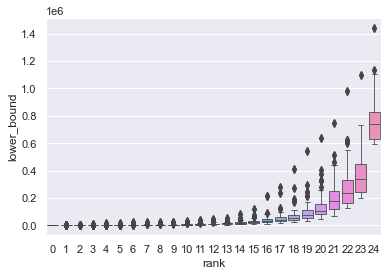

In [11]:
sns.boxplot(data=queries, x='rank', y='lower_bound', linewidth=0.8)

In [23]:
queries['inc_prev_rank'] = queries['lower_bound'].pct_change() + 1

In [24]:
queries.groupby('rank')['inc_prev_rank'].mean()

rank
0     0.000000
1          inf
2     3.604645
3     2.264619
4     1.666067
5     1.538191
6     1.418315
7     1.435947
8     1.415323
9     1.383069
10    1.332360
11    1.334067
12    1.348992
13    1.348142
14    1.316002
15    1.345621
16    1.411936
17    1.328353
18    1.358349
19    1.388760
20    1.425580
21    1.552744
22    1.411686
23    1.415614
24    2.207686
Name: inc_prev_rank, dtype: float64

In [34]:
queries.sort_values('num_queue_pops')

,weight_factor,graph,algo,from,lower_bound,num_pot_evals,num_queue_pops,num_relaxed_arcs,rank,result,running_time_ms,to,inc_prev_rank
0,1.1,/algoDaten/zeitz/roadgraphs/europe/,CH Potentials Query,8096279,0,3,1,10,0,0,2.158929,8096279,NaN
1500,1.4,/algoDaten/zeitz/roadgraphs/europe/,CH Potentials Query,1633690,0,4,1,8,0,0,0.319353,1633690,NaN
1475,1.4,/algoDaten/zeitz/roadgraphs/europe/,CH Potentials Query,11128000,0,5,1,9,0,0,0.227048,11128000,NaN
1575,1.1,/algoDaten/zeitz/roadgraphs/europe/,CH Potentials Query,10920050,0,2,1,4,0,0,0.475318,10920050,0.0
1450,1.4,/algoDaten/zeitz/roadgraphs/europe/,CH Potentials Query,15315403,0,2,1,3,0,0,0.312472,15315403,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1.5,/algoDaten/zeitz/roadgraphs/europe/,CH Potentials Query,14204618,1084029,5071470,3866817,19413963,24,1625210,2590.639657,15933590,NaN
249,1.5,/algoDaten/zeitz/roadgraphs/europe/,CH Potentials Query,10198434,802393,5107500,3879703,19529351,24,1202899,3031.916727,17690643,NaN
99,1.5,/algoDaten/zeitz/roadgraphs/europe/,CH Potentials Query,6940281,1137252,5114559,3889844,19407755,24,1704860,2815.369946,15546706,NaN
1574,1.5,/algoDaten/zeitz/roadgraphs/europe/,CH Potentials Query,6986891,1056993,5127568,3897755,19444719,24,1584614,2591.717306,16572573,NaN
